In [78]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config
from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config
from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [80]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Ridge/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
if config.diffusion == 0.1:
        diradd+= "LowNoise"
elif config.diffusion == 10.:
    diradd += "HighNoise"
hermite_dir += diradd+"/"
print(hermite_dir)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/BiPot/


In [81]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    assert "Diff" not in f
    if "T_MSEs" in f:
        print(hermite_dir+f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/BiPot/Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_MSEs.parquet


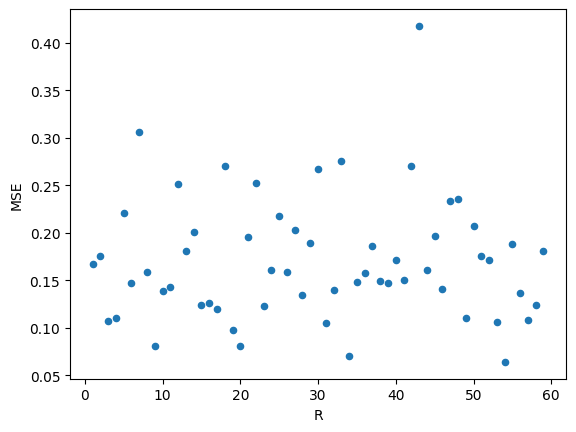

In [82]:
mse.reset_index(drop=False).plot(kind="scatter", x="index", y="0")
plt.xlabel("R")
plt.ylabel("MSE")
plt.show()
plt.close()

In [83]:
print(mse)
R = mse.dropna().iloc[np.argmin(mse.dropna().values.flatten())]
print("\n")
print(R)

              0
index          
1      0.167274
2      0.175924
3      0.106850
4      0.109874
5      0.220808
6      0.146634
7      0.306204
8      0.158700
9      0.081072
10     0.138335
11     0.142496
12     0.251718
13     0.181224
14     0.200651
15     0.123944
16     0.125722
17     0.119359
18     0.270692
19     0.097424
20     0.080606
21     0.196127
22     0.252521
23     0.122411
24     0.160703
25     0.218199
26     0.159233
27     0.202846
28     0.134500
29     0.189147
30     0.267305
31     0.104558
32     0.140239
33     0.275602
34     0.070063
35     0.148288
36     0.157524
37     0.186560
38     0.149723
39     0.146902
40     0.171702
41     0.150667
42     0.270753
43     0.417994
44     0.160741
45     0.197024
46     0.141197
47     0.233682
48     0.236164
49     0.110757
50     0.206722
51     0.175945
52     0.171672
53     0.105651
54     0.063998
55     0.188553
56     0.137125
57     0.108022
58     0.123472
59     0.180558


0    0.063998
Name: 54

In [84]:
try:
    R = R.name
except AttributeError:
    pass
num_paths = 10240
save_path = hermite_dir + f"Ridge_f{diradd}_DriftEvalExp_{num_paths}NPaths_{config.deltaT:.3e}dT".replace(".", "")
all_hermite_drifts = np.load(save_path + f"_{R}_drift_est.npy")
all_true_drifts=np.load(save_path + f"_{R}_true_drift.npy", allow_pickle=True)
all_true_paths = np.load(save_path + f"_{R}_true_paths.npy", allow_pickle=True)

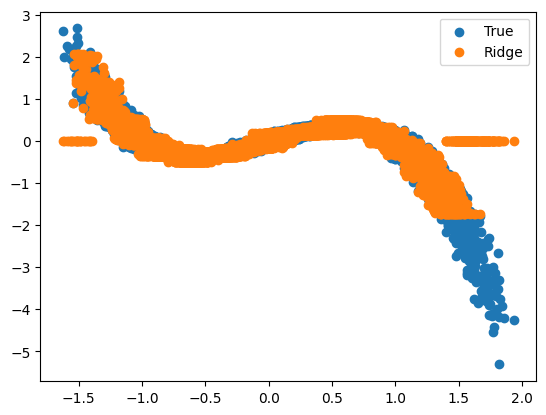

In [85]:
plt.scatter(all_true_paths.flatten(), all_true_drifts.flatten(), label="True")
plt.scatter(all_true_paths.flatten(), all_hermite_drifts.flatten(), label="Ridge")
plt.legend()
plt.show()